In [36]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from   statsmodels.tsa.vector_ar.vecm import coint_johansen
from   statsmodels.tsa.vector_ar.var_model import VAR

%matplotlib inline

In [15]:
DATA = 'data'
df = pd.read_csv(f'{DATA}/AQ.csv', 
                 sep=';', 
                 parse_dates=[['Date', 'Time']])
df.head()

,Date_Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,10/03/2004 18.00.00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,NaN,NaN
1,10/03/2004 19.00.00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,NaN,NaN
2,10/03/2004 20.00.00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,NaN,NaN
3,10/03/2004 21.00.00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,NaN,NaN
4,10/03/2004 22.00.00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,NaN,NaN


In [16]:
df.dtypes

Date_Time         object
CO(GT)           float64
PT08.S1(CO)      float64
NMHC(GT)         float64
C6H6(GT)         float64
PT08.S2(NMHC)    float64
NOx(GT)          float64
PT08.S3(NOx)     float64
NO2(GT)          float64
PT08.S4(NO2)     float64
PT08.S5(O3)      float64
T                float64
RH               float64
AH               float64
Unnamed: 15      float64
Unnamed: 16      float64
dtype: object

In [22]:
df.Date_Time = pd.to_datetime(df.Date_Time, format='%d/%m/%Y %H.%M.%S')
data = df.drop(['Date_Time', 'Unnamed: 15', 'Unnamed: 16', 'NMHC(GT)'], 
               axis=1)
data.index = df.Date_Time
data.head()

,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
Date_Time,,,,,,,,,,,,
2004-03-10 18:00:00,2.6,1360.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
2004-03-10 19:00:00,2.0,1292.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2004-03-10 20:00:00,2.2,1402.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
2004-03-10 21:00:00,2.2,1376.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
2004-03-10 22:00:00,1.6,1272.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888


In [23]:
data.fillna(axis=0, method='ffill', inplace=True)

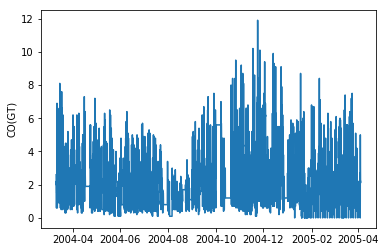

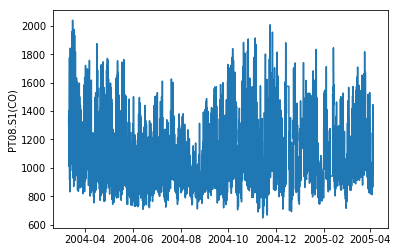

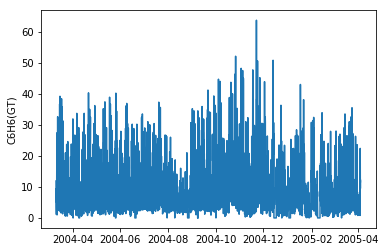

In [24]:
for f in list(data)[:3]:
    plt.figure();
    plt.plot(data.index, data[f])
    plt.ylabel(f);

In [28]:
# Test for stationarity
# cj(data, det_order, k_ar_diff); det_order: -1 no deterministic terms
#                                             0 const term
#                                             1 linear trend
#                                 k_ar_diff: no. lagged diffs in model
coint_johansen(data, -1, 1).eig

array([1.64637946e-01, 1.07267812e-01, 1.00939405e-01, 8.59542585e-02,
       7.26149411e-02, 6.73507579e-02, 4.13667646e-02, 3.38662345e-02,
       2.95301009e-02, 1.35412997e-02, 2.52268778e-03, 9.40720441e-05])

In [30]:
n = int(0.8 * data.shape[0])
train = data[:n]
valid = data[n:]
train.shape, valid.shape

((7485, 12), (1872, 12))

In [84]:
model = VAR(endog=train)
model_fit = model.fit(maxlags=30, ic='aic')

/usr/local/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


In [85]:
prediction = model_fit.forecast(model_fit.y, steps=len(valid))

In [86]:
cols = data.columns
pred = pd.DataFrame(data=prediction, index=valid.index, columns=cols)
pred.head()

,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
Date_Time,,,,,,,,,,,,
2005-01-16 15:00:00,0.821163,836.771001,2.229631,592.013652,127.041080,1127.998056,91.007454,812.788768,532.500715,10.797799,34.456419,0.439673
2005-01-16 16:00:00,1.053907,893.753952,3.498523,644.883416,186.838459,1085.061012,99.554947,851.242804,638.951423,10.688769,36.060255,0.448408
2005-01-16 17:00:00,1.371235,927.775665,4.491581,693.459399,262.537965,1046.208138,114.776748,883.521233,720.962775,9.822292,39.618803,0.444438
2005-01-16 18:00:00,1.643558,970.555603,5.568971,744.746415,316.601559,993.689867,124.181797,931.209435,812.013569,8.911503,43.684094,0.450980
2005-01-16 19:00:00,2.079254,1014.884647,6.956914,803.948906,355.904982,946.044208,131.250479,981.005848,900.594952,8.043365,46.938406,0.456879


In [87]:
def get_rmse(pred, target):
    return np.sqrt(((pred - target) ** 2).mean())

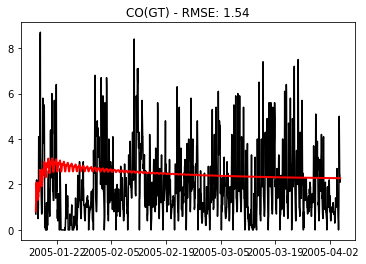

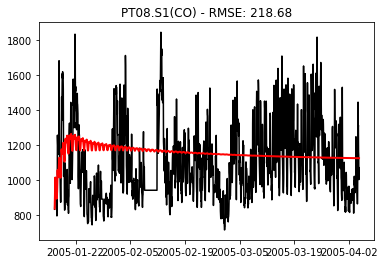

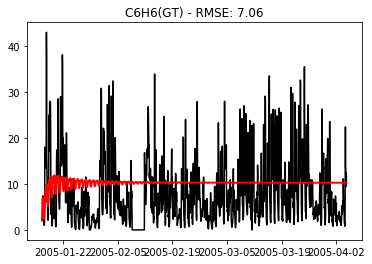

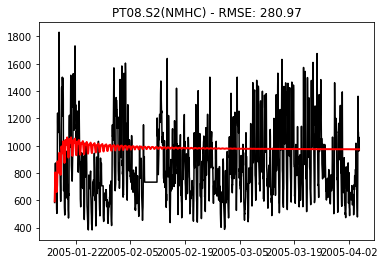

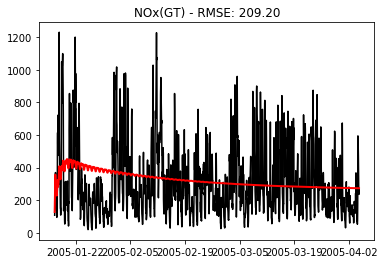

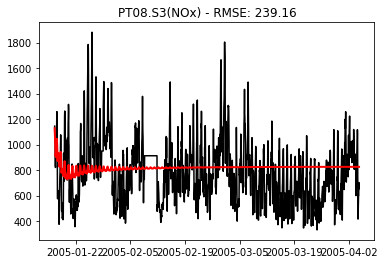

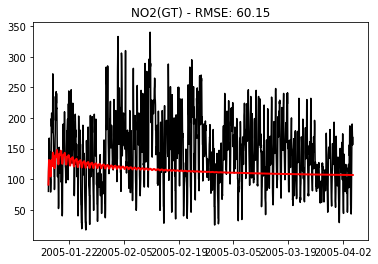

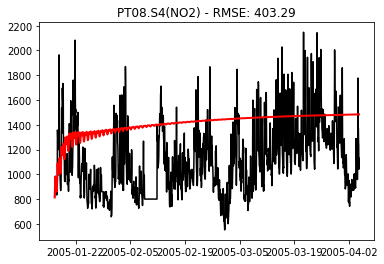

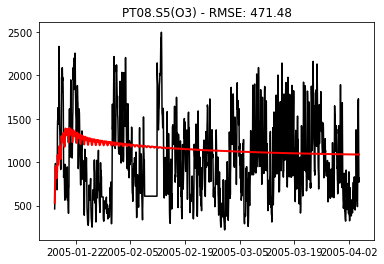

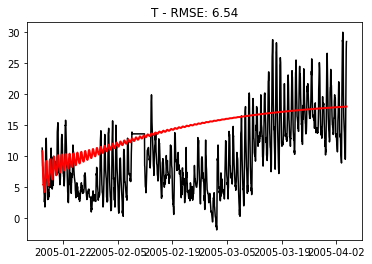

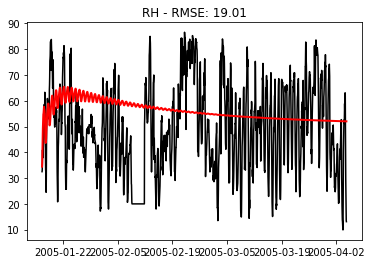

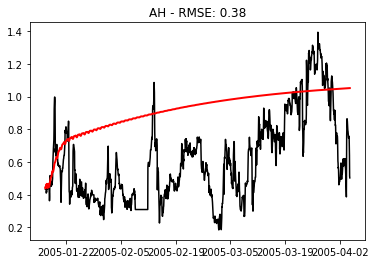

In [88]:
for field in list(pred):
    prediction = pred[field]
    target = valid[field]
    rmse = get_rmse(prediction, target)
    plt.figure()
    plt.plot(valid.index, target, 'k-')
    plt.plot(pred.index, prediction, 'r-', lw=2)
    plt.title(f'{field} - RMSE: {rmse:.2f}')

In [89]:
model_fit.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Wed, 17, Jul, 2019
Time:                     00:35:48
--------------------------------------------------------------------
No. of Equations:         12.0000    BIC:                    47.9985
Nobs:                     7459.00    HQIC:                   45.7118
Log likelihood:          -289270.    FPE:                2.15299e+19
AIC:                      44.5154    Det(Omega_mle):     1.31467e+19
--------------------------------------------------------------------
Results for equation CO(GT)
                       coefficient       std. error           t-stat            prob
------------------------------------------------------------------------------------
const                     0.028190         0.208256            0.135           0.892
L1.CO(GT)                 0.741957         0.021384           34.697           0.000
L1.PT08.S1(CO)            0.002146         

In [75]:
# Make final preds
model = VAR(endog=data)
model_fit = model.fit(maxlags=20, ic='aic')

/usr/local/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


In [76]:
yhat = model_fit.forecast(model_fit.y, steps=1000)

In [77]:
forecast = pd.DataFrame(data=yhat, columns=cols)
forecast.head()

,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2.695672,1134.834933,13.416876,1087.185458,314.726190,634.887884,173.388332,1203.522694,925.888568,28.633403,13.023017,0.518929
1,3.238056,1210.900287,16.194686,1165.118529,375.298742,602.478214,182.734128,1306.913361,1083.606931,27.509864,15.520071,0.544188
2,3.884934,1291.485673,19.043927,1262.237310,413.417836,543.607355,192.519404,1422.090350,1277.033773,25.325529,20.303228,0.579660
3,4.057832,1317.625334,19.523318,1277.188711,421.853447,513.154967,197.320594,1465.167447,1393.909173,22.916621,25.141387,0.628023
4,4.171004,1355.811658,19.912702,1301.392920,419.197366,478.614449,198.043613,1512.241930,1490.359974,20.331124,30.718427,0.673871


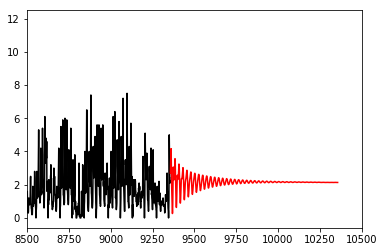

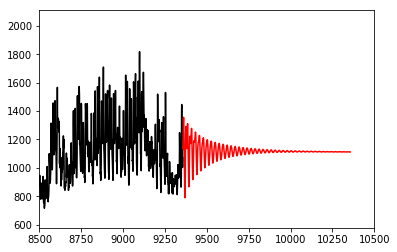

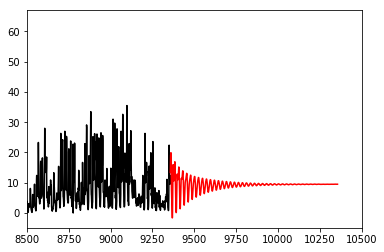

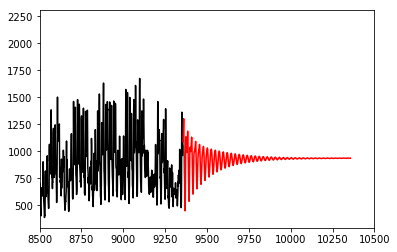

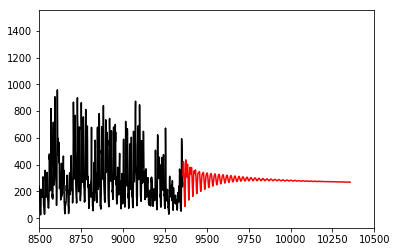

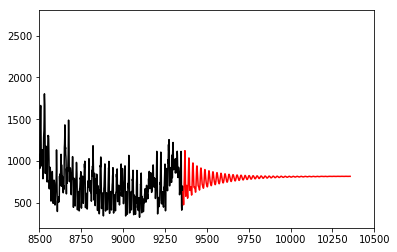

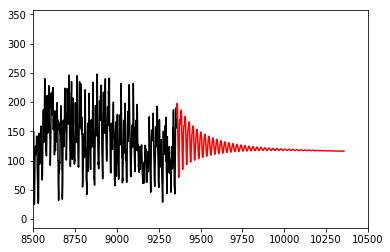

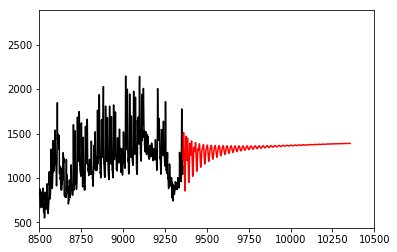

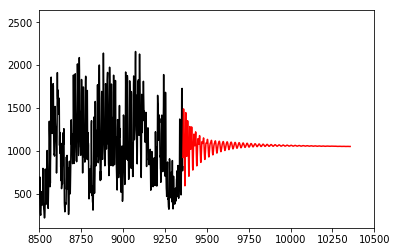

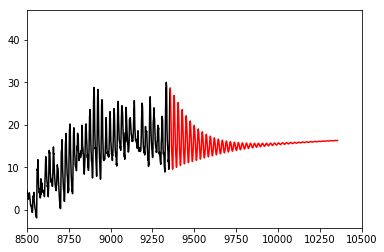

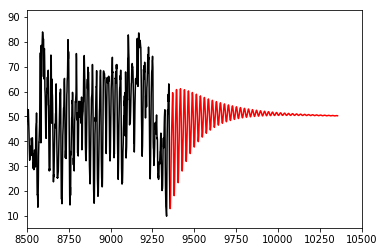

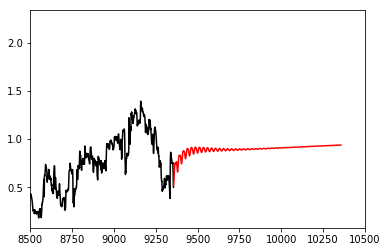

In [78]:
n_data = list(range(len(data)))
n_forecast = list(range(n_data[-1] + 1, n_data[-1] + len(forecast) + 1))

for f in list(forecast):
    plt.figure()
    plt.plot(n_data, data[f], 'k-')
    plt.plot(n_forecast, forecast[f], 'r-')
    plt.xlim([8500, 10500])

In [64]:
model.endog_names

['CO(GT)',
 'PT08.S1(CO)',
 'C6H6(GT)',
 'PT08.S2(NMHC)',
 'NOx(GT)',
 'PT08.S3(NOx)',
 'NO2(GT)',
 'PT08.S4(NO2)',
 'PT08.S5(O3)',
 'T',
 'RH',
 'AH']

In [68]:
model.select_order()